## Placement Logistic Regression 

In [78]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
df = pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [95]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [96]:
## dropping 1st column as it has no need 
df = df.drop("Unnamed: 0", axis = 1)

In [97]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [98]:
df.shape

(100, 3)

In [99]:
df.isnull().sum()  # no null values

cgpa         0
iq           0
placement    0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [101]:
df.placement.value_counts()  ## binary values

1    50
0    50
Name: placement, dtype: int64

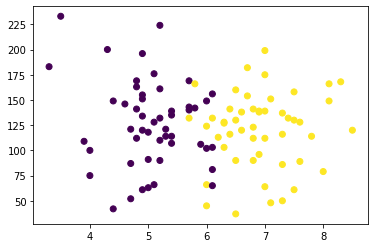

In [102]:
plt.scatter(df['cgpa'], df['iq'], c= df['placement'])
plt.show() 

# hear,  Blue points == Not placed
#        Yellow points == Got placed

In [103]:
## hear we will use logistic Regression Problem to classify our data points 

In [104]:
## seperating the dependent and independent variables
X = df.iloc[:, :-1]
X.head()  # X is 2-D Tensor 

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [125]:
y = df.iloc[:, -1]
y.head()  # y is 1-D tensor

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [126]:
## now spliting our data-set into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 90)

In [127]:
print("X_train total rows in X_train", len(X_train))
print(X_train.head())

print("\nX_test =")
print(X_test.head())

print("\ny_train =")
print(y_train.head())

print("\ny_test =")
print(y_test.head())

X_train total rows in X_train 80
    cgpa     iq
15   5.1  176.0
41   5.4  114.0
93   6.8  112.0
61   7.3  137.0
81   5.4  107.0

X_test =
    cgpa     iq
25   5.0   91.0
85   5.8  166.0
96   4.4   42.0
89   4.9  151.0
65   8.1  166.0

y_train =
15    0
41    0
93    1
61    1
81    0
Name: placement, dtype: int64

y_test =
25    0
85    1
96    0
89    0
65    1
Name: placement, dtype: int64


In [128]:
## Performing Scaling 
## we will make bring all the independent values in range of [0,1]

## for scaling we need StandardScaler form sklearn.preprocessing

scaler = StandardScaler()

In [129]:
X_train = scaler.fit_transform(X_train)  ## this converts it into an array 
# X_train 
X_test = scaler.fit_transform(X_test) 
# X_test

In [130]:
## now training model

clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_predicted = clf.predict(X_test)
y_predicted

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [132]:
# actual y values are 
y_test.head(10)

25    0
85    1
96    0
89    0
65    1
94    0
5     1
35    1
36    0
92    0
Name: placement, dtype: int64

In [133]:
## now calcuationg the accuricy 
## for this we will use accuracy_score from sklearn.mertics

acc = accuracy_score(y_predicted, y_test)
acc

0.9

In [134]:
print("Accuricy of model is :", acc*100, "%")

Accuricy of model is : 90.0 %


In [135]:
y_train.values

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [136]:
y_train.shape

(80,)

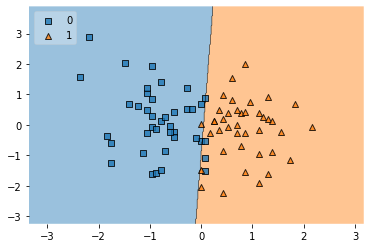

In [137]:
## plotting the decision Graph 

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

## Points to Remember

### Accuracy:

In [ ]:
## 1) In classification model when the output is yes/No ie. 0/1 the we find accuracy by accuracy_score
## from sklearn.metrics import accuracy_score    --> print(accuracy_score(y_predicted, y_test))

## 2) The confusion matrix is another metric that is often used to measure the performance of a classification algorithm.